In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [49]:
# EDC Ice Age Plot

#import posterior
edc_depth_age = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/output.txt"
edc_depth_age = pd.read_csv(edc_depth_age, comment="#", delimiter="\t", names=["depth", "ice_age", "sigma_ice_age", "air_age", "sigma_air_age", "sigma_delta_age", "deporate", "sigma_deporate", "thinning", "sigma_thinning", "LID", "sigma_LID", "delta_depth", "sigma_delta_depth", "deporate_model", "sigma_deporate_model", "thinning_model", "sigma_thinning_model", "LID_model", "sigma_LID_model", "icelayerthick", "sigma_icelayerthick", "airlayerthick", "sigma_airlayerthick"])

#import prior
edc_density = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/density.txt"
edc_deposition = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/deposition.txt"
edc_thinning = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/thinning.txt"

edc_density = pd.read_csv(edc_density, comment="#", delim_whitespace=True, names=["depth", "density"])
edc_deposition = pd.read_csv(edc_deposition, comment="#", delimiter="\t", names=["depth", "deposition (m/yr)", "uncertainty"])
edc_thinning = pd.read_csv(edc_thinning, comment="#", delimiter="\t", names=["depth", "thinning", "uncertainty"])


C:\Users\quinn\AppData\Local\Temp\ipykernel_3384\987913917.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edc_density = pd.read_csv(edc_density, comment="#", delim_whitespace=True, names=["depth", "density"])


In [100]:
edc_density_interp = np.interp(edc_deposition["depth"], edc_density["depth"], edc_density["density"])
edc_thinning_interp = np.interp(edc_deposition["depth"], edc_thinning["depth"], edc_thinning["thinning"])

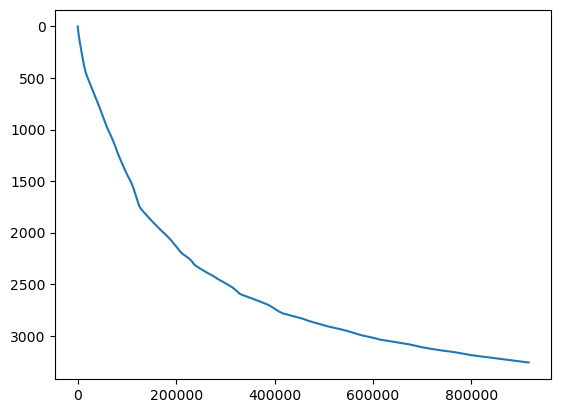

In [99]:
plt.plot(edc_depth_age['ice_age'], edc_depth_age['depth'], label='EDC Ice Age')
plt.gca().invert_yaxis()